In [1]:
import os
import numpy as np
import torch

In [2]:
os.getcwd()

'/home/zhuoyuan/MyProjects/LAINR-simplified/src/plot'

In [3]:
import sys
sys.path.append('../')

In [4]:
from metrics import get_metrics
from datasets import MetaData

In [5]:
root_path_sw = '/home/lizhuoyuan/datasets/shallow_water'

In [6]:
root_path_era5 = '/home/lizhuoyuan/datasets/ERA5'

In [7]:
metadata_sw_tr: MetaData = torch.load(os.path.join(root_path_sw, 'cached_meta_tr.pt'))
metadata_sw_va: MetaData = torch.load(os.path.join(root_path_sw, 'cached_meta_va.pt'))

In [8]:
metadata_era5_tr: MetaData = torch.load(os.path.join(root_path_era5, 'cached_meta_tr.pt'))
metadata_era5_va: MetaData = torch.load(os.path.join(root_path_era5, 'cached_meta_va.pt'))

In [9]:
trajs_sw_tr = metadata_sw_tr.trajs  # (ntrajs, Nsteps, *state_size, state_channels)
trajs_sw_va = metadata_sw_va.trajs  # (ntrajs, Nsteps, *state_size, state_channels)

ntrajs_tr, Nsteps_tr, *state_size_tr, state_channels_tr = trajs_sw_tr.shape
ntrajs_va, Nsteps_va, *state_size_va, state_channels_va = trajs_sw_va.shape

In [10]:
trajs_era5_tr = metadata_era5_tr.trajs  # (ntrajs, Nsteps, *state_size, state_channels)
trajs_era5_va = metadata_era5_va.trajs  # (ntrajs, Nsteps, *state_size, state_channels)

ntrajs_tr, Nsteps_tr, *state_size_tr, state_channels_tr = trajs_era5_tr.shape
ntrajs_va, Nsteps_va, *state_size_va, state_channels_va = trajs_era5_va.shape

In [11]:
X_sw_tr = trajs_sw_tr.reshape(trajs_sw_tr.shape[0] * trajs_sw_tr.shape[1], -1)  # (N, n)
X_sw_va = trajs_sw_va.reshape(trajs_sw_va.shape[0] * trajs_sw_va.shape[1], -1)  # (N, n)

X_sw_tr = np.float64(X_sw_tr.numpy())  # (N, n=128x64x2=16384)
X_sw_va = np.float64(X_sw_va.numpy())  # (N, n=128x64x2=16384)

print(f'{X_sw_tr.shape=}, {X_sw_va.shape=}')

X_sw_tr.shape=(4320, 16384), X_sw_va.shape=(480, 16384)


In [12]:
X_era5_tr = trajs_era5_tr.reshape(trajs_era5_tr.shape[0] * trajs_era5_tr.shape[1], -1)  # (N, n)
X_era5_va = trajs_era5_va.reshape(trajs_era5_va.shape[0] * trajs_era5_va.shape[1], -1)  # (N, n)

X_era5_tr = np.float64(X_era5_tr.numpy())  # (N, n=128x64x2=16384)
X_era5_va = np.float64(X_era5_va.numpy())  # (N, n=128x64x2=16384)

print(f'{X_era5_tr.shape=}, {X_era5_va.shape=}')

X_era5_tr.shape=(8400, 16384), X_era5_va.shape=(480, 16384)


In [13]:
X_sw_tr = (X_sw_tr - X_sw_tr.mean(axis=0)) / np.sqrt(X_sw_tr.shape[0])
res_sw = np.linalg.svd(X_sw_tr.T, full_matrices=False)  # (n, n)
print(res_sw.U.shape)  # (16384, 4320) = (128x64x2, 18x240)
print(res_sw.S.shape)  # (4320,)
print(res_sw.Vh.shape)  # (4320, 4320)

(16384, 4320)
(4320,)
(4320, 4320)


In [14]:
X_era5_tr = (X_era5_tr - X_era5_tr.mean(axis=0)) / np.sqrt(X_era5_tr.shape[0])
res_era5 = np.linalg.svd(X_era5_tr.T, full_matrices=False)  # (n, n)
print(res_era5.U.shape)  # (16384, 4320) = (128x64x2, 18x240)
print(res_era5.S.shape)  # (4320,)
print(res_era5.Vh.shape)  # (4320, 4320)

(16384, 8400)
(8400,)
(8400, 8400)


In [15]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [16]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [ ]:
df1 = pd.DataFrame({'eigenvalues': pd.Series(res_sw.S),
                   'index of modes': list(range(len(res_sw.S)))})
df2 = pd.DataFrame({'eigenvalues': pd.Series(res_era5.S),
                   'index of modes': list(range(len(res_era5.S)))})
df1['dataset'] = 'shallow-water'
df2['dataset'] = 'ERA5'
df = pd.concat([df1, df2])
df0 = df[df.index < 4000]

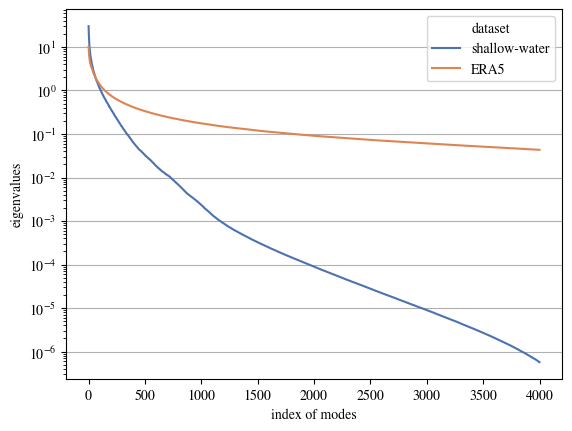

In [19]:
ax = sns.lineplot(data=df0, palette="deep", hue='dataset', x='index of modes', y='eigenvalues')
ax.set_yscale('log')
ax.grid(axis='y')
plt.savefig('eigenvalues.pdf', bbox_inches='tight')